In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it
from itertools import combinations

from sklearn.preprocessing import StandardScaler
import torch

## Load the Data

In [4]:
# File paths
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_3/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_3/initial_outputs.npy"

# Load the data
inputs = np.load(input_file_path)
outputs = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(inputs, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df['Output'] = outputs

df

,Input_1,Input_2,Input_3,Output
0,0.171525,0.343917,0.248737,-0.112122
1,0.242114,0.644074,0.272433,-0.087963
2,0.534906,0.398501,0.173389,-0.111415
3,0.492581,0.611593,0.340176,-0.034835
4,0.134622,0.219917,0.458206,-0.048008
5,0.345523,0.941360,0.269363,-0.110621
6,0.151837,0.439991,0.990882,-0.398926
7,0.645503,0.397143,0.919771,-0.113869
8,0.746912,0.284196,0.226300,-0.131461
9,0.170477,0.697032,0.149169,-0.094190


In [5]:
#Adicion de datos conforme el concurso ha avanzado

#Datos pre-competencia que aparecieron
new_data_0=pd.DataFrame([{'Input_1':0.111111,'Input_2':0.111111,'Input_3':0.111111,'Output':-0.1090975}]) 
df=pd.concat([df,new_data_0],ignore_index=True)

# Datos previos

df.loc[len(df)]=[0.85,0.05,0.681579,-0.186269804]
df.loc[len(df)]=[0.52,0.95,0.95,-0.25190155]
df.loc[len(df)]=[0.9,0.9,0.1,-0.077603862]
df.loc[len(df)]=[0.01,0.5,0.732105,-0.128965502]
df.loc[len(df)]=[0.9,0.9,0.9,-0.099834643]
df.loc[len(df)]=[0.01,0.99,0.99,-0.423896123]

df.loc[len(df)]=[0.85,0.05,0.681579,-0.189427552]
df.loc[len(df)]=[0.52,0.95,0.95,-0.24113275]
df.loc[len(df)]=[0.9,0.9,0.1,-0.07209753]
df.loc[len(df)]=[0.01,0.5,0.732105,-0.122378147]
df.loc[len(df)]=[0.9,0.9,0.9,-0.093110786]
df.loc[len(df)]=[0.01,0.99,0.99,-0.423896123]
df.loc[len(df)]=[0.98,0.98,0.02,-0.097738777]
df.loc[len(df)]=[0.473684,0.68421,0.210527,-0.130718049]

df.loc[len(df)]=[0.85,0.05,0.681579,-0.192696452419187]
df.loc[len(df)]=[0.52,0.95,0.95,-0.256703632296161]
df.loc[len(df)]=[0.9,0.9,0.1,-0.0778932334825719]
df.loc[len(df)]=[0.01,0.5,0.732105,-0.123605083541493]
df.loc[len(df)]=[0.9,0.9,0.9,-0.0926333729946998]
df.loc[len(df)]=[0.01,0.99,0.99,-0.442482848172646]
df.loc[len(df)]=[0.98,0.98,0.02,-0.10744730512971]
df.loc[len(df)]=[0.473684,0.68421,0.210527,-0.13335319713019]
df.loc[len(df)]=[0.473684,0.473684,0.473684,-0.0335630947301124]

df.loc[len(df)]=[0.85,0.05,0.681579,-0.196944574]
df.loc[len(df)]=[0.52,0.95,0.95,-0.239419115]
df.loc[len(df)]=[0.9,0.9,0.1,-0.079887826]
df.loc[len(df)]=[0.01,0.5,0.732105,-0.120634084]
df.loc[len(df)]=[0.9,0.9,0.9,-0.092633373]
df.loc[len(df)]=[0.01,0.99,0.99,-0.423896123]
df.loc[len(df)]=[0.98,0.98,0.02,-0.092406578]
df.loc[len(df)]=[0.473684,0.68421,0.210527,-0.119073716]
df.loc[len(df)]=[0.473684,0.473684,0.473684,-0.015310471]
df.loc[len(df)]=[1.00000e-06,2.92930e-01,4.74748e-01,-0.018309383]
df.loc[len(df)]=[0.717171,0.575757,0.575757,-0.031395603]

df.loc[len(df)]=[0.85,0.05,0.681579,-0.202362845413635]
df.loc[len(df)]=[0.52,0.95,0.95,-0.234868309480986]
df.loc[len(df)]=[0.9,0.9,0.1,-0.0720975299563213]
df.loc[len(df)]=[0.01,0.5,0.732105,-0.122100502448941]
df.loc[len(df)]=[0.9,0.9,0.9,-0.100241919911485]
df.loc[len(df)]=[0.01,0.99,0.99,-0.435872343290886]
df.loc[len(df)]=[0.98,0.98,0.02,-0.0924065776914295]
df.loc[len(df)]=[0.473684,0.68421,0.210527,-0.131523368844946]
df.loc[len(df)]=[0.473684,0.473684,0.473684,-0.00400498754505595]
df.loc[len(df)]=[1.00000e-06,2.92930e-01,4.74748e-01,-0.0207402361646096]
df.loc[len(df)]=[0.717171,0.575757,0.575757,-0.0492782764716119]
df.loc[len(df)]=[1.00000e-06,3.13132e-01,4.74748e-01,-0.0236744997317792]
df.loc[len(df)]=[0.999999,0.545454,0.797979,-0.0681719956481182]

df.loc[len(df)]=[0.85,0.05,0.681579,-0.190756734170178]
df.loc[len(df)]=[0.52,0.95,0.95,-0.234868309480986]
df.loc[len(df)]=[0.9,0.9,0.1,-0.0720975299563213]
df.loc[len(df)]=[0.01,0.5,0.732105,-0.121664729779169]
df.loc[len(df)]=[0.9,0.9,0.9,-0.11614129640921]
df.loc[len(df)]=[0.01,0.99,0.99,-0.441061141249445]
df.loc[len(df)]=[0.98,0.98,0.02,-0.0942425238239262]
df.loc[len(df)]=[0.473684,0.68421,0.210527,-0.124975956520223]
df.loc[len(df)]=[0.473684,0.473684,0.473684,-0.0156675073984243]
df.loc[len(df)]=[1.00000e-06,2.92930e-01,4.74748e-01,-0.0237568600939123]
df.loc[len(df)]=[0.717171,0.575757,0.575757,-0.0313956029415289]
df.loc[len(df)]=[1.00000e-06,3.13132e-01,4.74748e-01,-0.0253000854580021]
df.loc[len(df)]=[0.999999,0.545454,0.797979,-0.0686583765531683]
df.loc[len(df)]=[0.05,0.05,0.505051,-0.0831781982472969]

df.loc[len(df)]=[0.85,0.05,0.681579,-0.196201093]
df.loc[len(df)]=[0.52,0.95,0.95,-0.245977785]
df.loc[len(df)]=[0.9,0.9,0.1,-0.102939586]
df.loc[len(df)]=[0.01,0.5,0.732105,-0.121559308]
df.loc[len(df)]=[0.9,0.9,0.9,-0.092633373]
df.loc[len(df)]=[0.01,0.99,0.99,-0.431213369]
df.loc[len(df)]=[0.98,0.98,0.02,-0.094773289]
df.loc[len(df)]=[0.473684,0.68421,0.210527,-0.132910213]
df.loc[len(df)]=[0.473684,0.473684,0.473684,-0.008287746]
df.loc[len(df)]=[1.00000e-06,2.92930e-01,4.74748e-01,-0.018309383]
df.loc[len(df)]=[0.717171,0.575757,0.575757,-0.044114752]
df.loc[len(df)]=[1.00000e-06,3.13132e-01,4.74748e-01,-0.012818097]
df.loc[len(df)]=[0.999999,0.545454,0.797979,-0.075443604]
df.loc[len(df)]=[0.05,0.05,0.505051,-0.083178198]
df.loc[len(df)]=[1.00000e-06,9.99999e-01,1.00000e-06,-0.155357392]

df.loc[len(df)]=[0.85,0.05,0.681579,-0.186269804133839]
df.loc[len(df)]=[0.52,0.95,0.95,-0.234868309480986]
df.loc[len(df)]=[0.9,0.9,0.1,-0.0720975299563213]
df.loc[len(df)]=[0.01,0.5,0.732105,-0.122095423114279]
df.loc[len(df)]=[0.9,0.9,0.9,-0.0926333729946998]
df.loc[len(df)]=[0.01,0.99,0.99,-0.429971106145189]
df.loc[len(df)]=[0.98,0.98,0.02,-0.0924065776914295]
df.loc[len(df)]=[0.473684,0.68421,0.210527,-0.119073715716015]
df.loc[len(df)]=[0.473684,0.473684,0.473684,-0.0023110016319748]
df.loc[len(df)]=[1.00000e-06,2.92930e-01,4.74748e-01,-0.0321667616625832]
df.loc[len(df)]=[0.717171,0.575757,0.575757,-0.0410696519702299]
df.loc[len(df)]=[1.00000e-06,3.13132e-01,4.74748e-01,-0.0188619229595283]
df.loc[len(df)]=[0.999999,0.545454,0.797979,-0.0729136004421032]
df.loc[len(df)]=[0.05,0.05,0.505051,-0.0831781982472969]
df.loc[len(df)]=[1.00000e-06,9.99999e-01,1.00000e-06,-0.14808034531471]
df.loc[len(df)]=[6.30872e-01,8.99328e-01,1.00000e-06,-0.134127314511216]
df.loc[len(df)]=[6.64429e-01,7.65100e-01,1.00000e-06,-0.11076562273923]

# ***************************************
# *** Adicional cpñ
df.loc[len(df)]=[0.436884,0.453066,0.442615,-0.004062]
df.loc[len(df)]=[0.436884,0.453066,0.442615,-0.010063]
df.loc[len(df)]=[0.742412,0.625096,0.423735,-0.0036179926]
#******

df.loc[len(df)]=[0.85,0.05,0.681579,-0.186269804133839]
df.loc[len(df)]=[0.52,0.95,0.95,-0.241632660840898]
df.loc[len(df)]=[0.9,0.9,0.1,-0.073799466414065]
df.loc[len(df)]=[0.01,0.5,0.732105,-0.131839549351191]
df.loc[len(df)]=[0.9,0.9,0.9,-0.118609173621337]
df.loc[len(df)]=[0.01,0.99,0.99,-0.438020275868071]
df.loc[len(df)]=[0.98,0.98,0.02,-0.108386970148731]
df.loc[len(df)]=[0.473684,0.68421,0.210527,-0.125867762100638]
df.loc[len(df)]=[0.473684,0.473684,0.473684,-0.0295971143211374]
df.loc[len(df)]=[1.00000e-06,2.92930e-01,4.74748e-01,-0.0350320376883004]
df.loc[len(df)]=[0.717171,0.575757,0.575757,-0.0342574169309776]
df.loc[len(df)]=[1.00000e-06,3.13132e-01,4.74748e-01,-0.0214951042125691]
df.loc[len(df)]=[0.999999,0.545454,0.797979,-0.0614392346250294]
df.loc[len(df)]=[0.05,0.05,0.505051,-0.085269747630913]
df.loc[len(df)]=[1.00000e-06,9.99999e-01,1.00000e-06,-0.14808034531471]
df.loc[len(df)]=[6.30872e-01,8.99328e-01,1.00000e-06,-0.132976757525917]
df.loc[len(df)]=[6.64429e-01,7.65100e-01,1.00000e-06,-0.11076562273923]
df.loc[len(df)]=[0.436884,0.453066,0.442615,-0.00366269811211988]
df.loc[len(df)]=[0.742412,0.625096,0.423735,-0.0105332736214541]

df.loc[len(df)]=[0.85,0.05,0.681579,-0.189671713383941]
df.loc[len(df)]=[0.52,0.95,0.95,-0.238274852940735]
df.loc[len(df)]=[0.9,0.9,0.1,-0.0821046707124699]
df.loc[len(df)]=[0.01,0.5,0.732105,-0.115379885399686]
df.loc[len(df)]=[0.9,0.9,0.9,-0.112148956864697]
df.loc[len(df)]=[0.01,0.99,0.99,-0.42744146284556]
df.loc[len(df)]=[0.98,0.98,0.02,-0.103323902836508]
df.loc[len(df)]=[0.473684,0.68421,0.210527,-0.137521672741877]
df.loc[len(df)]=[0.473684,0.473684,0.473684,-0.0023110016319748]
df.loc[len(df)]=[1.00000e-06,2.92930e-01,4.74748e-01,-0.0183093833840348]
df.loc[len(df)]=[0.717171,0.575757,0.575757,-0.0521611245139441]
df.loc[len(df)]=[1.00000e-06,3.13132e-01,4.74748e-01,-0.0221837538387374]
df.loc[len(df)]=[0.999999,0.545454,0.797979,-0.0636488788858643]
df.loc[len(df)]=[0.05,0.05,0.505051,-0.0831781982472969]
df.loc[len(df)]=[1.00000e-06,9.99999e-01,1.00000e-06,-0.14808034531471]
df.loc[len(df)]=[6.30872e-01,8.99328e-01,1.00000e-06,-0.132976757525917]
df.loc[len(df)]=[6.64429e-01,7.65100e-01,1.00000e-06,-0.112527042389392]
df.loc[len(df)]=[0.436884,0.453066,0.442615,-0.0261408957175615]
df.loc[len(df)]=[0.742412,0.625096,0.423735,-0.00598908731892825]
df.loc[len(df)]=[0.590604,0.52349,0.469799,-0.000380384333290447]

df.loc[len(df)]=[0.85,0.05,0.681579,-0.197793474929998]
df.loc[len(df)]=[0.52,0.95,0.95,-0.234868309480986]
df.loc[len(df)]=[0.9,0.9,0.1,-0.0791149373869554]
df.loc[len(df)]=[0.01,0.5,0.732105,-0.128709104552009]
df.loc[len(df)]=[0.9,0.9,0.9,-0.0926333729946998]
df.loc[len(df)]=[0.01,0.99,0.99,-0.426738014432821]
df.loc[len(df)]=[0.98,0.98,0.02,-0.111909174924108]
df.loc[len(df)]=[0.473684,0.68421,0.210527,-0.124310817563953]
df.loc[len(df)]=[0.473684,0.473684,0.473684,-0.00668077291732208]
df.loc[len(df)]=[1.00000e-06,2.92930e-01,4.74748e-01,-0.0312715152050072]
df.loc[len(df)]=[0.717171,0.575757,0.575757,-0.0484359335678853]
df.loc[len(df)]=[1.00000e-06,3.13132e-01,4.74748e-01,-0.0191541971703193]
df.loc[len(df)]=[0.999999,0.545454,0.797979,-0.0624039664682418]
df.loc[len(df)]=[0.05,0.05,0.505051,-0.0850410208487589]
df.loc[len(df)]=[1.00000e-06,9.99999e-01,1.00000e-06,-0.189608739148364]
df.loc[len(df)]=[6.30872e-01,8.99328e-01,1.00000e-06,-0.138499879822084]
df.loc[len(df)]=[6.64429e-01,7.65100e-01,1.00000e-06,-0.11076562273923]
df.loc[len(df)]=[0.436884,0.453066,0.442615,-0.0194004321672674]
df.loc[len(df)]=[0.742412,0.625096,0.423735,-0.013803457356062]
df.loc[len(df)]=[0.590604,0.52349,0.469799,-0.000380384333290447]
df.loc[len(df)]=[0.516778,0.623154,0.536174,-0.0255072777906625]

df.loc[len(df)]=[0.85,0.05,0.681579,-0.186269804133839]
df.loc[len(df)]=[0.52,0.95,0.95,-0.243260235528932]
df.loc[len(df)]=[0.9,0.9,0.1,-0.0800727756449691]
df.loc[len(df)]=[0.01,0.5,0.732105,-0.135866586680116]
df.loc[len(df)]=[0.9,0.9,0.9,-0.0971676879432538]
df.loc[len(df)]=[0.01,0.99,0.99,-0.42543612957582]
df.loc[len(df)]=[0.98,0.98,0.02,-0.0924065776914295]
df.loc[len(df)]=[0.473684,0.68421,0.210527,-0.124573466633992]
df.loc[len(df)]=[0.473684,0.473684,0.473684,-0.0023110016319748]
df.loc[len(df)]=[1.00000e-06,2.92930e-01,4.74748e-01,-0.0194061603540051]
df.loc[len(df)]=[0.717171,0.575757,0.575757,-0.0457877081556183]
df.loc[len(df)]=[1.00000e-06,3.13132e-01,4.74748e-01,-0.012818097223269]
df.loc[len(df)]=[0.999999,0.545454,0.797979,-0.0614392346250294]
df.loc[len(df)]=[0.05,0.05,0.505051,-0.0951472059971437]
df.loc[len(df)]=[1.00000e-06,9.99999e-01,1.00000e-06,-0.169762781984712]
df.loc[len(df)]=[6.30872e-01,8.99328e-01,1.00000e-06,-0.136048335025311]
df.loc[len(df)]=[6.64429e-01,7.65100e-01,1.00000e-06,-0.125534946967226]
df.loc[len(df)]=[0.436884,0.453066,0.442615,-0.00366269811211988]
df.loc[len(df)]=[0.742412,0.625096,0.423735,-0.00727688193214194]
df.loc[len(df)]=[0.590604,0.52349,0.469799,-0.000380384333290447]
df.loc[len(df)]=[0.516778,0.623154,0.536174,-0.0133883716204621]
df.loc[len(df)]=[0.597315,0.524497,0.462349,-0.00695966565026085]

df.loc[len(df)]=[0.85,0.05,0.681579,-0.202297651132556]
df.loc[len(df)]=[0.52,0.95,0.95,-0.250784771145763]
df.loc[len(df)]=[0.9,0.9,0.1,-0.0774843430646152]
df.loc[len(df)]=[0.01,0.5,0.732105,-0.11769594638189]
df.loc[len(df)]=[0.9,0.9,0.9,-0.105753915220898]
df.loc[len(df)]=[0.01,0.99,0.99,-0.429059864451498]
df.loc[len(df)]=[0.98,0.98,0.02,-0.0924065776914295]
df.loc[len(df)]=[0.473684,0.68421,0.210527,-0.134509128528126]
df.loc[len(df)]=[0.473684,0.473684,0.473684,-0.0023110016319748]
df.loc[len(df)]=[1.00000e-06,2.92930e-01,4.74748e-01,-0.0183093833840348]
df.loc[len(df)]=[0.717171,0.575757,0.575757,-0.0366223815701315]
df.loc[len(df)]=[1.00000e-06,3.13132e-01,4.74748e-01,-0.012818097223269]
df.loc[len(df)]=[0.999999,0.545454,0.797979,-0.0685864137106439]
df.loc[len(df)]=[0.05,0.05,0.505051,-0.0831781982472969]
df.loc[len(df)]=[1.00000e-06,9.99999e-01,1.00000e-06,-0.156780761064238]
df.loc[len(df)]=[6.30872e-01,8.99328e-01,1.00000e-06,-0.132976757525917]
df.loc[len(df)]=[6.64429e-01,7.65100e-01,1.00000e-06,-0.11076562273923]
df.loc[len(df)]=[0.436884,0.453066,0.442615,-0.00366269811211988]
df.loc[len(df)]=[0.742412,0.625096,0.423735,-0.00628637908670635]
df.loc[len(df)]=[0.590604,0.52349,0.469799,-0.000380384333290447]
df.loc[len(df)]=[0.516778,0.623154,0.536174,-0.044584909709926]
df.loc[len(df)]=[0.597315,0.524497,0.462349,-0.000186586580011592]
df.loc[len(df)]=[0.596638,0.641596,0.454538,-0.00236696584843643]

df.loc[len(df)]=[0.85,0.05,0.681579,-0.186269804133839]
df.loc[len(df)]=[0.52,0.95,0.95,-0.244269148875357]
df.loc[len(df)]=[0.9,0.9,0.1,-0.0798331629346694]
df.loc[len(df)]=[0.01,0.5,0.732105,-0.115314429040306]
df.loc[len(df)]=[0.9,0.9,0.9,-0.101346295287426]
df.loc[len(df)]=[0.01,0.99,0.99,-0.435645681205406]
df.loc[len(df)]=[0.98,0.98,0.02,-0.0924065776914295]
df.loc[len(df)]=[0.473684,0.68421,0.210527,-0.122196059706822]
df.loc[len(df)]=[0.473684,0.473684,0.473684,-0.00665302953533719]
df.loc[len(df)]=[1.00000e-06,2.92930e-01,4.74748e-01,-0.0216635603166782]
df.loc[len(df)]=[0.717171,0.575757,0.575757,-0.0421786771808887]
df.loc[len(df)]=[1.00000e-06,3.13132e-01,4.74748e-01,-0.0227054153164983]
df.loc[len(df)]=[0.999999,0.545454,0.797979,-0.0614392346250294]
df.loc[len(df)]=[0.05,0.05,0.505051,-0.085623392815234]
df.loc[len(df)]=[1.00000e-06,9.99999e-01,1.00000e-06,-0.148551807448787]
df.loc[len(df)]=[6.30872e-01,8.99328e-01,1.00000e-06,-0.142127162147746]
df.loc[len(df)]=[6.64429e-01,7.65100e-01,1.00000e-06,-0.13083896794529]
df.loc[len(df)]=[0.436884,0.453066,0.442615,-0.0216068680469601]
df.loc[len(df)]=[0.742412,0.625096,0.423735,-0.0237611536787183]
df.loc[len(df)]=[0.590604,0.52349,0.469799,-0.000380384333290447]
df.loc[len(df)]=[0.516778,0.623154,0.536174,-0.020562118793533]
df.loc[len(df)]=[0.597315,0.524497,0.462349,-0.0172739283633592]
df.loc[len(df)]=[0.596638,0.641596,0.454538,-0.00862701565005826]
df.loc[len(df)]=[0.899159,0.656722,0.48395 ,-0.0136948298051575]

#Print
df

,Input_1,Input_2,Input_3,Output
0,0.171525,0.343917,0.248737,-0.112122
1,0.242114,0.644074,0.272433,-0.087963
2,0.534906,0.398501,0.173389,-0.111415
3,0.492581,0.611593,0.340176,-0.034835
4,0.134622,0.219917,0.458206,-0.048008
...,...,...,...,...
236,0.590604,0.523490,0.469799,-0.000380
237,0.516778,0.623154,0.536174,-0.020562
238,0.597315,0.524497,0.462349,-0.017274
239,0.596638,0.641596,0.454538,-0.008627


In [6]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

Basic Statistical Summary:
          Input_1     Input_2     Input_3      Output
count  241.000000  241.000000  241.000000  241.000000
mean     0.499963    0.622910    0.491264   -0.111251
std      0.355683    0.294557    0.315833    0.104171
min      0.000001    0.050000    0.000001   -0.442483
25%      0.050000    0.453066    0.210527   -0.132977
50%      0.520000    0.623154    0.474748   -0.092633
75%      0.850000    0.900000    0.732105   -0.031396
max      0.999999    0.999999    0.990882   -0.000187


In [7]:
# File paths SEGUNDO SET
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_3/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_3/initial_outputs.npy"

# Load the data
inputs2 = np.load(input_file_path)
outputs2 = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df2 = pd.DataFrame(inputs2, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df2['Output'] = outputs2

df2

,Input_1,Input_2,Input_3,Output
0,0.165700,0.256856,0.654690,-0.128094
1,0.650996,0.424173,0.526744,-0.031039
2,0.106013,0.243332,0.650257,-0.117276
3,0.352164,0.105808,0.065468,-0.079444
4,0.829086,0.439369,0.207134,-0.142586
5,0.804893,0.312070,0.243714,-0.119621
6,0.462041,0.129396,0.838586,-0.061199
7,0.822171,0.466507,0.549292,-0.034359
8,0.985148,0.720883,0.776440,-0.087697
9,0.186743,0.606741,0.669580,-0.115022


In [8]:
df = pd.concat([df, df2], ignore_index=True)
df


,Input_1,Input_2,Input_3,Output
0,0.171525,0.343917,0.248737,-0.112122
1,0.242114,0.644074,0.272433,-0.087963
2,0.534906,0.398501,0.173389,-0.111415
3,0.492581,0.611593,0.340176,-0.034835
4,0.134622,0.219917,0.458206,-0.048008
...,...,...,...,...
251,0.288103,0.702974,0.898496,-0.074789
252,0.087427,0.266736,0.301280,-0.104416
253,0.874361,0.867538,0.894363,-0.089455
254,0.703504,0.185323,0.819923,-0.087600


## Function 3: Drug Discovery Problem
#### In this example, you are doing drug discovery! You can select three compounds to create a drug, and receive a measurement of the people’s adverse reaction to the drug. You want to make this as close as possible to zero. (hint: one of the variables may not cause any effects on the person).

In [10]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Basic Statistical Summary:
          Input_1     Input_2     Input_3      Output
count  256.000000  256.000000  256.000000  256.000000
mean     0.501505    0.610046    0.496191   -0.109801
std      0.352671    0.295381    0.313249    0.101585
min      0.000001    0.050000    0.000001   -0.442483
25%      0.050000    0.453066    0.210527   -0.132107
50%      0.520000    0.609167    0.474748   -0.092633
75%      0.850000    0.900000    0.732105   -0.033214
max      0.999999    0.999999    0.990882   -0.000187

Missing values in the dataset:
Input_1    0
Input_2    0
Input_3    0
Output     0
dtype: int64


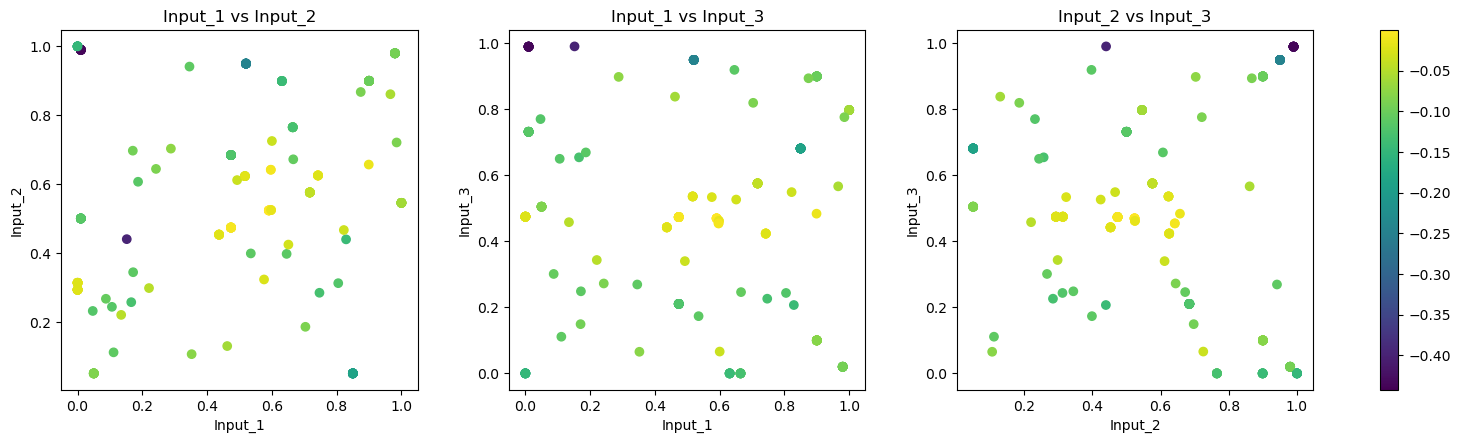

In [11]:
from itertools import combinations

# Calculate all pair combinations of input columns
input_columns = df.columns[df.columns.str.startswith('Input')]  # Select only columns that start with 'Input'
pair_combinations = list(combinations(input_columns, 2))  # Get all combinations of Input columns taken 2 at a time

# Determine the grid size for subplots
num_plots = len(pair_combinations)
num_cols = 3  # Set number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed, round up

# Create a figure with subplots in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))  # Adjust figure size as needed
fig.tight_layout(pad=4.0)  # Add spacing between plots

# Flatten axes array for easier iteration if it's 2D
axes = axes.flatten()

# Plotting each combination in the grid
for i, (x_col, y_col) in enumerate(pair_combinations):
    ax = axes[i]
    scatter = ax.scatter(df[x_col], df[y_col], c=df['Output'], cmap='viridis')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')

# Add a colorbar to the last plot
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=.02)

# Turn off axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

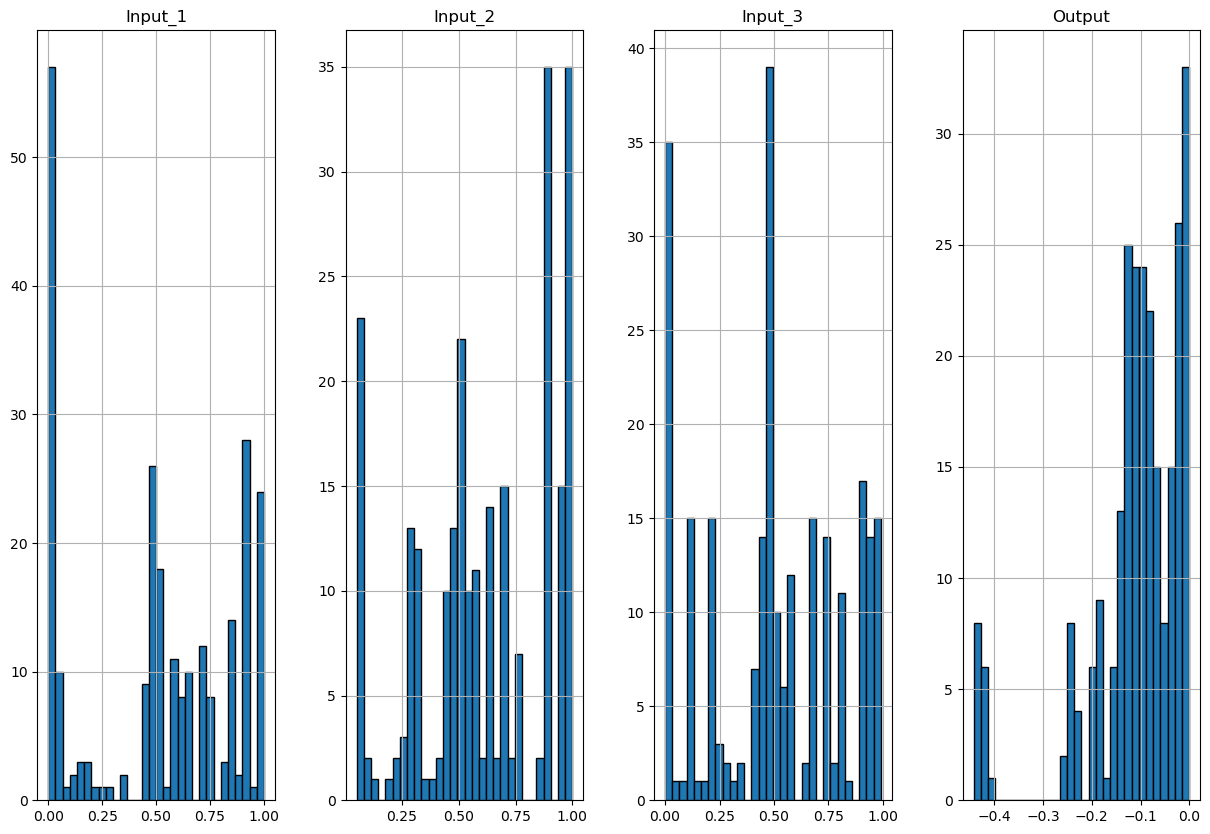

In [12]:
# Plot histograms for each column to understand distributions
df.hist(bins=30, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.5)
plt.show()

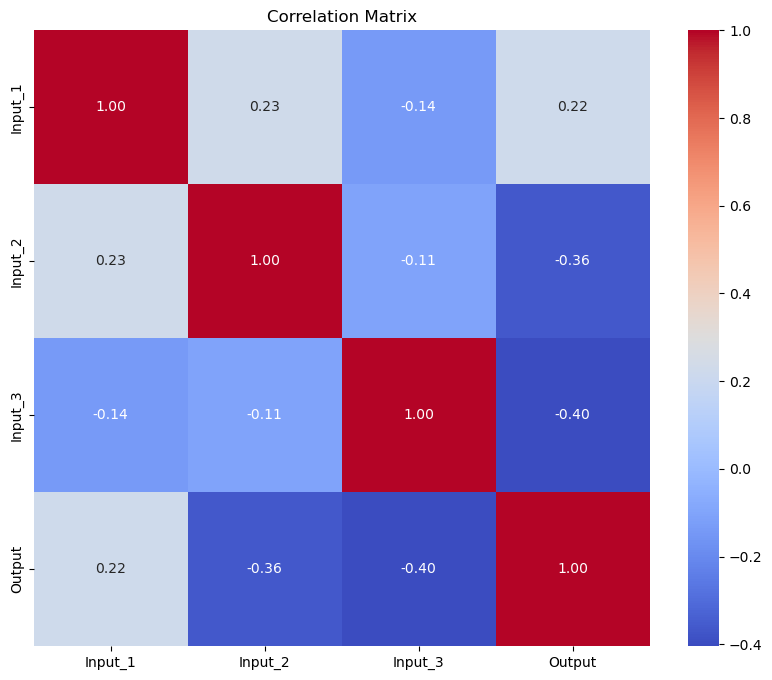

In [13]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


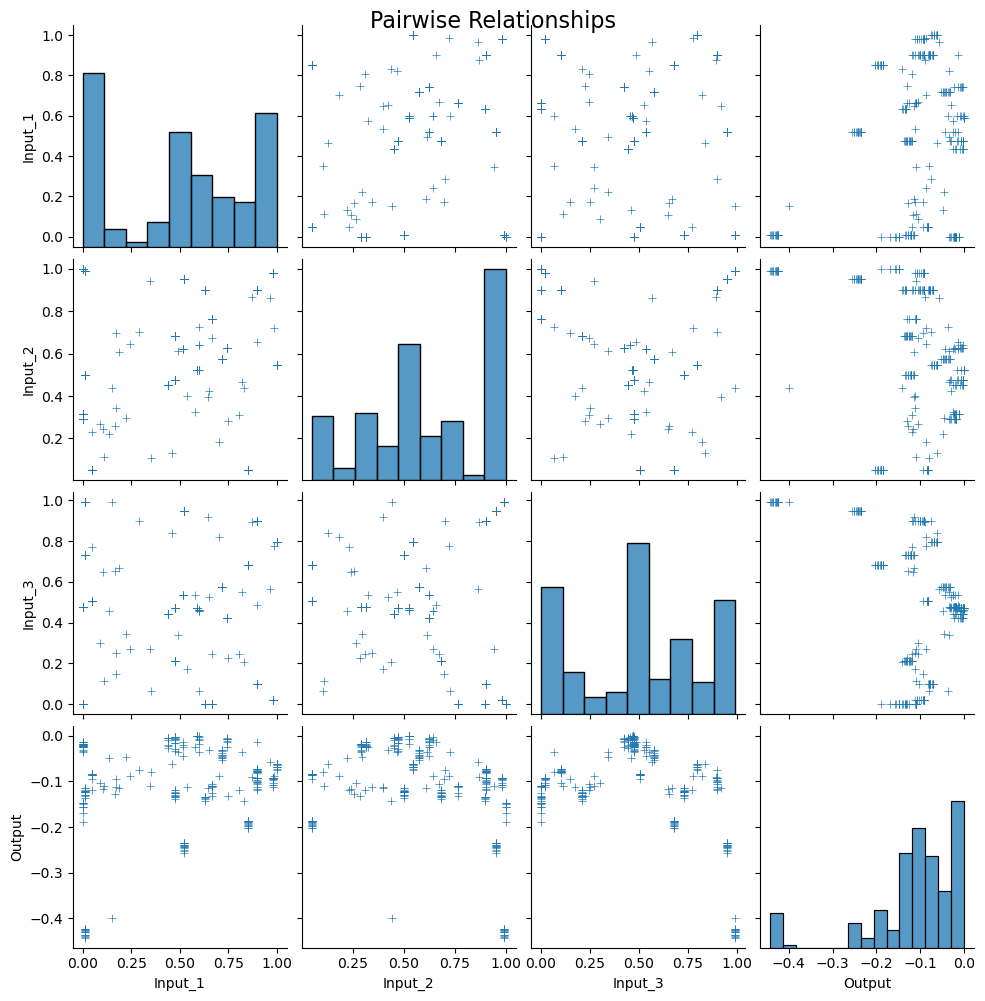

In [14]:
# Use pairplot to visualize the relationships between variables
sns.pairplot(df, kind='scatter', diag_kind='hist', markers='+')
plt.suptitle('Pairwise Relationships', verticalalignment='baseline', fontsize=16)
plt.show()

# New model With all historiccal outputs

In [26]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning
from itertools import combinations

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df.drop(columns=['Output'])
y = df[['Output']]

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 1, name='length_scale'),
    Real(1e-15, 1e-2, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

#****
# Define custom ranges for each input
# Modify these ranges as needed
input_ranges = [
    (0.000001, 0.999999),  # Range for Input_1
    (0.450001, 0.749999),  # Range for Input_2
    (0.360001, 0.609999)   # Range for Input_3
    # Add more ranges for additional inputs if necessary
]

# Ensure the number of ranges matches the number of inputs
if len(input_ranges) != X.shape[1]:
    raise ValueError("The number of input ranges must match the number of inputs.")

#****   
    
GG = 120  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)

# Convert to DataFrame with appropriate column names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
# Scale the grid points
X_grid_scaled = scaler_X.transform(X_grid_df)

# Predictions using the surrogate model
mean_scaled, std_scaled = GPR_model_best.predict(X_grid_scaled, return_std=True)
mean_scaled = mean_scaled.reshape(-1, 1)  # Reshape to 2D array
mean = scaler_y.inverse_transform(mean_scaled).flatten()  # Inverse transform to original scale and flatten to 1D array
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 0.01
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Calculate and collect query points
query_points = [
    (next_query_ucb, 'UCB Beta 0.01', 'red', 'o')
]

# Test different beta values for UCB and other acquisition functions
for beta, color, marker in zip([1.00,1.96, 2.6], ['blue', 'green', 'purple'], ['x', 's', 'd']):
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    query_points.append((next_query, f'UCB Beta {beta}', color, marker))
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")



Best length scale: 0.06165934781418427
Best noise level: 0.003995499301191423
Next query point UCB with Beta 0.01: [0.504202-0.565967-0.435631]
Next query point UCB with Beta 1.0: [0.436975-0.571009-0.433530]
Next query point UCB with Beta 1.96: [0.999999-0.749999-0.360001]
Next query point UCB with Beta 2.6: [0.000001-0.586135-0.420925]


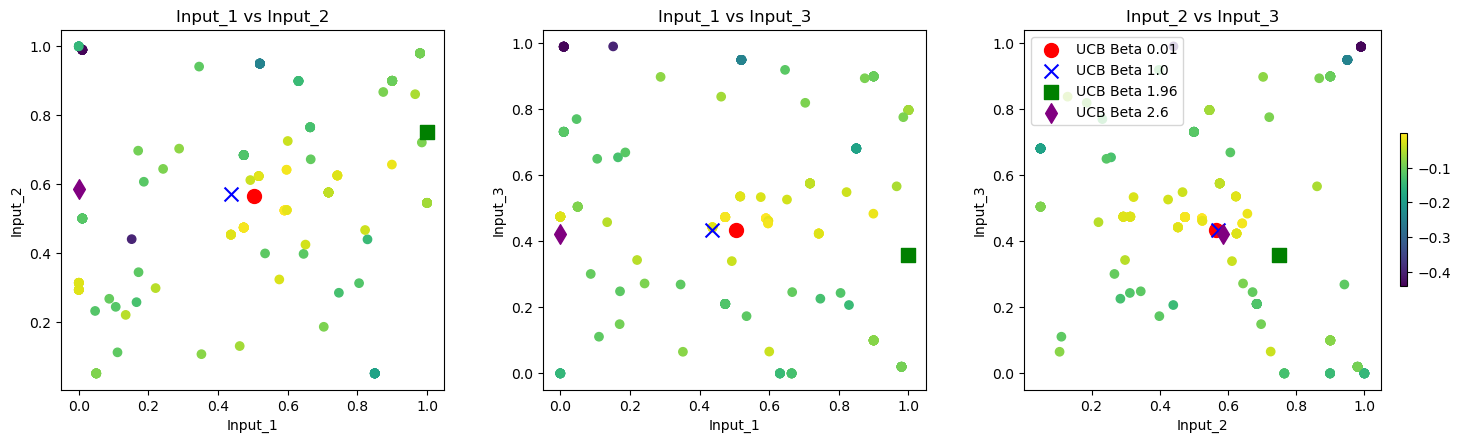

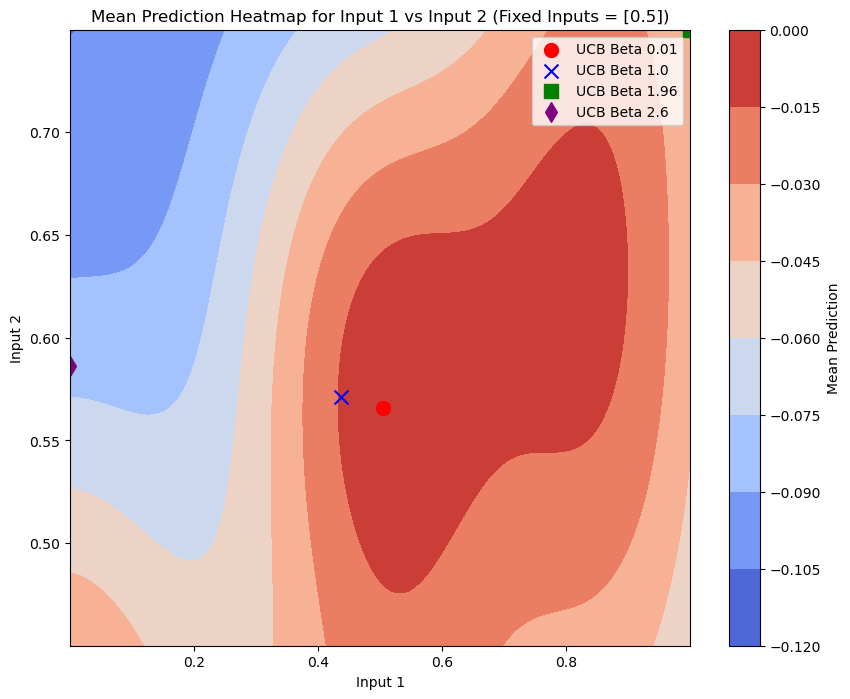

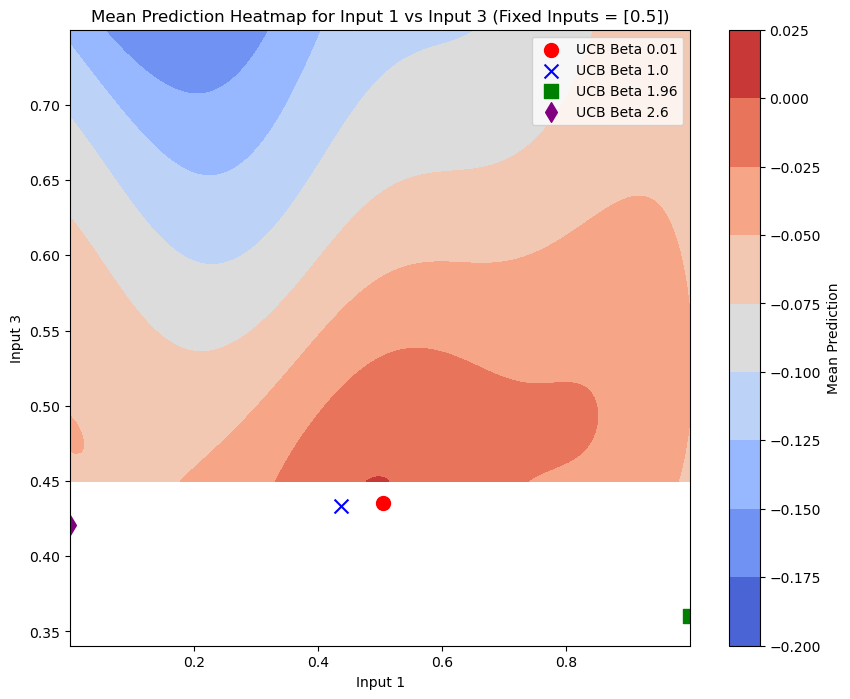

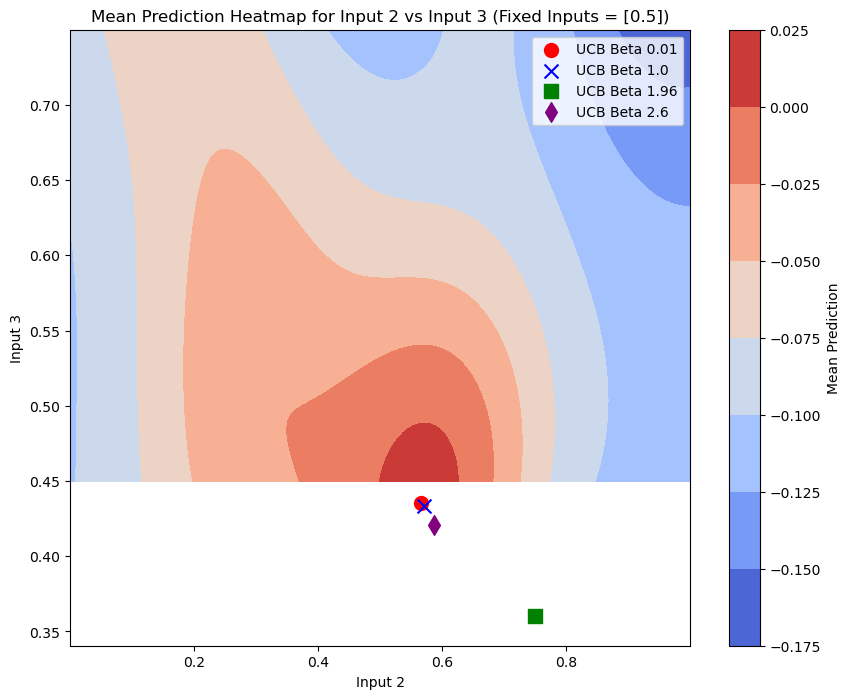

In [27]:
# Visualization function to include pairwise scatter plots and heatmaps
def visualize_data(X_original, y_original, X_grid, query_points, input_ranges):
    num_inputs = X_original.shape[1]
    
    # Pairwise scatter plots with color gradient and query points
    if num_inputs > 1:
        input_columns = X_original.columns
        pair_combinations = list(combinations(input_columns, 2))
        num_plots = len(pair_combinations)
        num_cols = 3
        num_rows = (num_plots + num_cols - 1) // num_cols

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
        fig.tight_layout(pad=4.0)
        axes = axes.flatten()

        for i, (x_col, y_col) in enumerate(pair_combinations):
            ax = axes[i]
            scatter = ax.scatter(X_original[x_col], X_original[y_col], c=y_original.values.flatten(), cmap='viridis')
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title(f'{x_col} vs {y_col}')
            
            for query, label, color, marker in query_points:
                ax.scatter(query[input_columns.get_loc(x_col)], query[input_columns.get_loc(y_col)], color=color, marker=marker, s=100, label=label)
            
            if i == num_plots - 1:
                fig.colorbar(scatter, ax=ax, orientation='vertical', fraction=.02)
        
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.legend()
        plt.show()

    # Generate heatmaps for all pairs of inputs
    for (i, j) in combinations(range(num_inputs), 2):
        fixed_input_values = [0.5] * (num_inputs - 2)
        fixed_indices = [k for k in range(num_inputs) if k != i and k != j]

        X_grid_fixed = generate_grid(input_ranges[:2], GG)
        X_grid_fixed_full = np.zeros((X_grid_fixed.shape[0], num_inputs))
        X_grid_fixed_full[:, [i, j]] = X_grid_fixed
        for idx, fixed_val in zip(fixed_indices, fixed_input_values):
            X_grid_fixed_full[:, idx] = fixed_val

        X_grid_fixed_full_df = pd.DataFrame(X_grid_fixed_full, columns=X_original.columns)
        X_grid_fixed_scaled = scaler_X.transform(X_grid_fixed_full_df)
        mean_fixed_scaled, std_fixed_scaled = GPR_model_best.predict(X_grid_fixed_scaled, return_std=True)
        mean_fixed = scaler_y.inverse_transform(mean_fixed_scaled.reshape(-1, 1)).flatten()

        plt.figure(figsize=(10, 8))
        plt.contourf(X_grid_fixed[:, 0].reshape(GG, GG), X_grid_fixed[:, 1].reshape(GG, GG), mean_fixed.reshape(GG, GG), cmap='coolwarm')
        plt.colorbar(label='Mean Prediction')
        
        for query, label, color, marker in query_points:
            plt.scatter(query[i], query[j], color=color, marker=marker, s=100, label=label)

        plt.title(f'Mean Prediction Heatmap for Input {i+1} vs Input {j+1} (Fixed Inputs = {fixed_input_values})')
        plt.xlabel(f'Input {i+1}')
        plt.ylabel(f'Input {j+1}')
        plt.legend()
        plt.show()

# Call the visualization function using the original data
visualize_data(X, y, X_grid, query_points, input_ranges)

# Modelo de ruido con datos completos


In [29]:
# If there are multiple outputs for the same input, aggregate them
historical_feedback = df.groupby(['Input_1', 'Input_2','Input_3']).agg(
    mean_output=('Output', 'mean'),
    var_output=('Output', 'var')
).reset_index()

# Fill NaN values in var_output with a small positive number
historical_feedback['var_output'].fillna(1e-10, inplace=True)

# Sort the DataFrame by Input_3, Input_2, and then Input_1
sorted_feedback = historical_feedback.sort_values(by=['Input_3', 'Input_2', 'Input_1'])

# Print the sorted DataFrame
print(sorted_feedback)

     Input_1   Input_2   Input_3  mean_output    var_output
37  0.664429  0.765100  0.000001    -0.115995  7.212771e-05
34  0.630872  0.899328  0.000001    -0.135676  1.233110e-05
2   0.000001  0.999999  0.000001    -0.158038  2.186287e-04
52  0.980000  0.980000  0.020000    -0.097866  5.258617e-05
20  0.352164  0.105808  0.065468    -0.079444  1.000000e-10
33  0.600097  0.725136  0.066089    -0.036378  1.000000e-10
49  0.900000  0.900000  0.100000    -0.078509  6.193118e-05
9   0.111111  0.111111  0.111111    -0.109098  1.000000e-10
13  0.170477  0.697032  0.149169    -0.094190  1.000000e-10
28  0.534906  0.398501  0.173389    -0.111415  1.000000e-10
45  0.829086  0.439369  0.207134    -0.142586  1.000000e-10
24  0.473684  0.684210  0.210527    -0.127739  3.639997e-05
42  0.746912  0.284196  0.226300    -0.131461  1.000000e-10
43  0.804893  0.312070  0.243714    -0.119621  1.000000e-10
38  0.666014  0.671985  0.246295    -0.105965  1.000000e-10
14  0.171525  0.343917  0.248737    -0.1

In [30]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_ei, gaussian_pi, gaussian_lcb
from sklearn.preprocessing import StandardScaler
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning


# If there are multiple outputs for the same input, aggregate them
historical_feedback = df.groupby(['Input_1', 'Input_2','Input_3']).agg(
    mean_output=('Output', 'mean'),
    var_output=('Output', 'var')
).reset_index()

# Fill NaN values in var_output with a small positive number
historical_feedback['var_output'].fillna(1e-10, inplace=True)

#print(historical_feedback)

# Prepare data for GP model
X = historical_feedback[['Input_1', 'Input_2','Input_3']]
y_mean = historical_feedback['mean_output']
y_var = historical_feedback['var_output']

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y_mean = StandardScaler()
y_mean_scaled = scaler_y_mean.fit_transform(y_mean.values.reshape(-1, 1)).flatten()

# Incorporate variance into noise level
noise_level_scaled = scaler_y_mean.transform(y_var.values.reshape(-1, 1)).flatten()

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 0.5, name='length_scale'),
    Real(1e-15, 1e-1, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=1e-5)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=1.0, optimizer=None)  # Significantly increased alpha
    GPR_model.fit(X_scaled, y_mean_scaled + 1e-5 * np.random.randn(*y_mean_scaled.shape))  # Regularize targets
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel with WhiteKernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=1e-5)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=1.0, optimizer=None)  # Significantly increased alpha
GPR_model_best.fit(X_scaled, y_mean_scaled + 1e-5 * np.random.randn(*y_mean_scaled.shape))  # Regularize targets

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

# Define custom ranges for each input
# Modify these ranges as needed
input_ranges = [
    (0.000001, 0.999999),  # Range for Input_1
    (0.450001, 0.749999),  # Range for Input_2
    (0.360001, 0.609999)   # Range for Input_3
    # Add more ranges for additional inputs if necessary
]

GG = 150  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)
X_grid_scaled = scaler_X.transform(X_grid)  # Scale the grid points

# Predictions using the surrogate model
mean_scaled, std_scaled = GPR_model_best.predict(X_grid_scaled, return_std=True)
mean_scaled = mean_scaled.reshape(-1, 1)  # Reshape to 2D array
mean = scaler_y_mean.inverse_transform(mean_scaled).flatten()  # Inverse transform to original scale and flatten to 1D array
std = std_scaled * scaler_y_mean.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 0.01
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Test different beta values for UCB and other acquisition functions
for beta in [1, 1.96, 2.6]:
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")

/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 1e-15] before, using random point [0.3333703355058937, 0.06924198132993528]
  warnings.warn(
/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 1e-15] before, using random point [0.13894178459383985, 0.004721780333149439]
  warnings.warn(
/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 1e-15] before, using random point [0.4284249651224161, 0.0505090529412038]
  warnings.warn(
/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 1e-15] before, using random point [0.0854433465464642, 0.09946152914450136]
  warnings.warn(
/opt/an

Best length scale: 0.5
Best noise level: 0.08716407590617543


/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Next query point UCB with Beta 0.01: [0.570470-0.536578-0.472416]
Next query point UCB with Beta 1: [0.577181-0.530537-0.467383]
Next query point UCB with Beta 1.96: [0.731543-0.749999-0.524429]
Next query point UCB with Beta 2.6: [0.724832-0.749999-0.551275]
